In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/paoloandreini/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import os,sys,inspect
# currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# parentdir = os.path.dirname(currentdir)
# parentdir = os.path.dirname(parentdir)
parentdir = "/Users/paoloandreini/Desktop/github_repo/DDFM_correction_paper/DDFM"
sys.path.insert(0,parentdir)
import warnings
warnings.filterwarnings("ignore")

In [76]:
# Load results
# rmsfe_ar = pd.read_csv(f"{parentdir}/examples/empirical/results/rmsfe_ar1_all.csv", index_col=[0,1,2])
# rmsfe_ar.index.names=["variable", "step-ahead", "model"]
# rmsfe_ar.columns =["RMSFE"]
# rmsfe_ar = rmsfe_ar.droplevel("model")
rmsfe_models = pd.read_csv(f"{parentdir}/examples/empirical/results/rmsfe_publ_lag_0_all_final.csv", index_col=[0,1,2])
rmsfe_models.index.names=["variable", "step-ahead", "model"]
rmsfe_models.columns =["RMSFE"]

In [77]:
# load reuslts ddfm
rmsfe_ddfm = pd.read_csv(f"{parentdir}/examples/empirical/results/ddfms_rmsfe_final.csv")#, index_col=[0,1])
rmsfe_ddfm["Unnamed: 0"] =rmsfe_ddfm["Unnamed: 0"].str.replace("Forecasting Horizon ", "t")
rmsfe_ddfm.columns = ["step-ahead", "variable", "Symmetric", "Asymmetric"]
rmsfe_ddfm = rmsfe_ddfm.set_index(["variable", "step-ahead"])

In [78]:
rmsfe_all = pd.concat([rmsfe_models.squeeze().unstack("model"), rmsfe_ddfm], axis=1)
rmsfe_all = rmsfe_all.stack()
rmsfe_all.index.names = ["variable", "step-ahead", "model"]

In [79]:
rmsfe_ratio = (rmsfe_all.unstack("model").T/rmsfe_all.unstack("model")["AR1"]).T
rmsfe_ratio = rmsfe_ratio.drop("AR1", axis=1)

In [80]:
#rmsfe_ratio= rmsfe_ratio.filter(like="ymm")

In [81]:
# rmsfe_ratio = (rmsfe_all/rmsfe_ar.squeeze())
# rmsfe_ratio.unstack("model") 

In [82]:
rmsfe_ratio_per_models = rmsfe_ratio
(rmsfe_ratio_per_models < 1).sum()/len(rmsfe_ratio_per_models)

model
LAPC          0.704724
PC            0.653543
PC2           0.425197
TPC           0.714567
TPC2          0.488189
TSPC          0.625984
Symmetric     0.277559
Asymmetric    0.155512
dtype: float64

In [83]:
rmsfe_ratio_per_models = rmsfe_ratio
(rmsfe_ratio_per_models < 1).sum()/len(rmsfe_ratio_per_models)

model
LAPC          0.704724
PC            0.653543
PC2           0.425197
TPC           0.714567
TPC2          0.488189
TSPC          0.625984
Symmetric     0.277559
Asymmetric    0.155512
dtype: float64

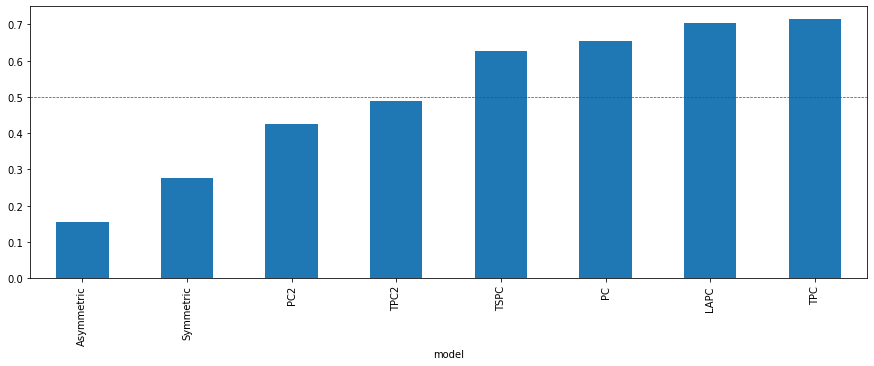

In [84]:
((rmsfe_ratio_per_models < 1).sum()/len(rmsfe_ratio_per_models)).sort_index().sort_values().plot(kind="bar", figsize=(15,5))
plt.axhline(0.5, linestyle="--", color='red', linewidth=0.7)
plt.show()

In [85]:
rmsfe_ratio_per_models_step = rmsfe_ratio.unstack("step-ahead")
((rmsfe_ratio_per_models_step < 1).sum()/len(rmsfe_ratio_per_models_step)).sort_index()

model       step-ahead
Asymmetric  t1            0.173228
            t12           0.125984
            t24           0.110236
            t6            0.212598
LAPC        t1            0.307087
            t12           0.834646
            t24           0.826772
            t6            0.850394
PC          t1            0.212598
            t12           0.803150
            t24           0.795276
            t6            0.803150
PC2         t1            0.062992
            t12           0.566929
            t24           0.653543
            t6            0.417323
Symmetric   t1            0.165354
            t12           0.330709
            t24           0.291339
            t6            0.322835
TPC         t1            0.275591
            t12           0.905512
            t24           0.842520
            t6            0.834646
TPC2        t1            0.062992
            t12           0.677165
            t24           0.645669
            t6            0.5669

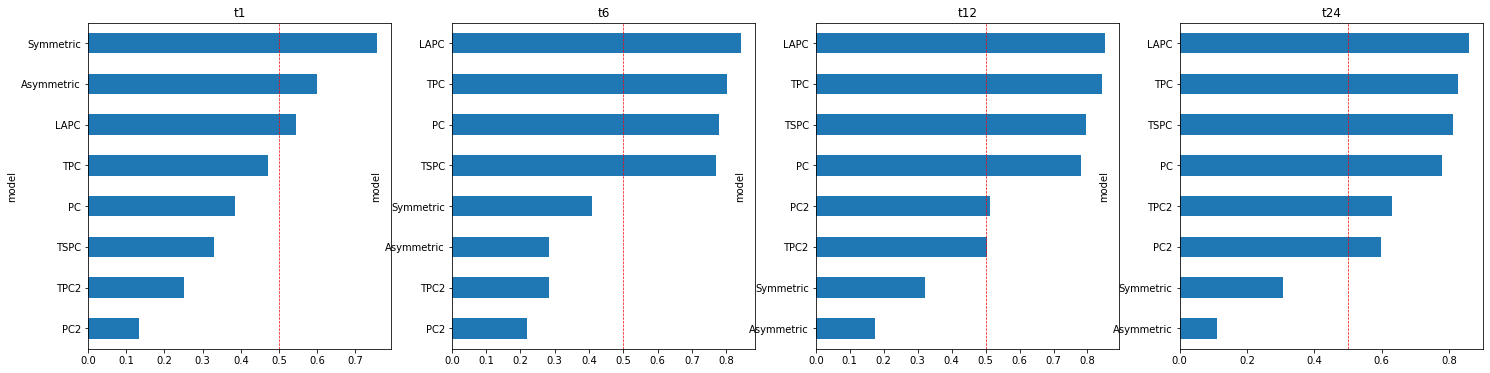

In [70]:
fig, ax = plt.subplots(1,4, figsize=(25,6))
ii = 0
for i in ['t1', 't6', 't12', 't24']:#rmsfe_ratio_per_models_step.columns.unique("step-ahead"):
    rmsfe_i = rmsfe_ratio_per_models_step.xs(i, axis=1, level=1)
    #pd.DataFrame(((rmsfe_i <= 1).sum()/len(rmsfe_i)).sort_values()).plot(kind="barh", ax=ax[ii])
    ax[ii].axvline(0.5, linestyle="--", color='red', linewidth=0.7)
    ((rmsfe_i <= 1).sum()/len(rmsfe_i)).sort_values().plot(kind="barh", title=i, ax=ax[ii])
    ii+=1
plt.show()

1. "RPI"= real personal income
2. "INDPRO", =industrial production
3. "IPMANSICS" = industrial production manufacturing
4. "CUMFNS"= capacity utilization
5. "PAYEMS"=Total nonfarm payroll
6. "MANEMP"=Total nonfarm payroll manufactuing
7. "CLAIMSx"=initial claims
8. "UNRATE"=unempl rate
9. "CES2000000008"= Avg Earning Manufacturing
10. "CES3000000008", Avg Earning Construction
11. "DPCERA3M086SBEA"= Real Personal Consumption exepnditure
12. "UMCSENTx"=Consumer Sentiment index
13. "CPIAUCSL"= CPI All: headline
14. "CPIULFSL= CPI Core: Less Food (energy included)
15. retail sales to add



1. change target using h-step ahead
2. abrchart variable each forecast horizon
3. table as Bai/Ng with rmsfe ratio per each step-head.


In [71]:
important_var = ["RPI", "INDPRO", "IPMANSICS", "CUMFNS", "PAYEMS", "MANEMP", "CLAIMSx", "UNRATE", "CES2000000008", "CES3000000008", "DPCERA3M086SBEA", 
                "UMCSENTx", "CPIAUCSL", "CPIULFSL", "CUSR0000SAC"]

spreads = ['AAAFFM', 'BAAFFM', 'T10YFFM', 'T1YFFM', 'T5YFFM', 'TB3SMFFM',
       'TB6SMFFM']

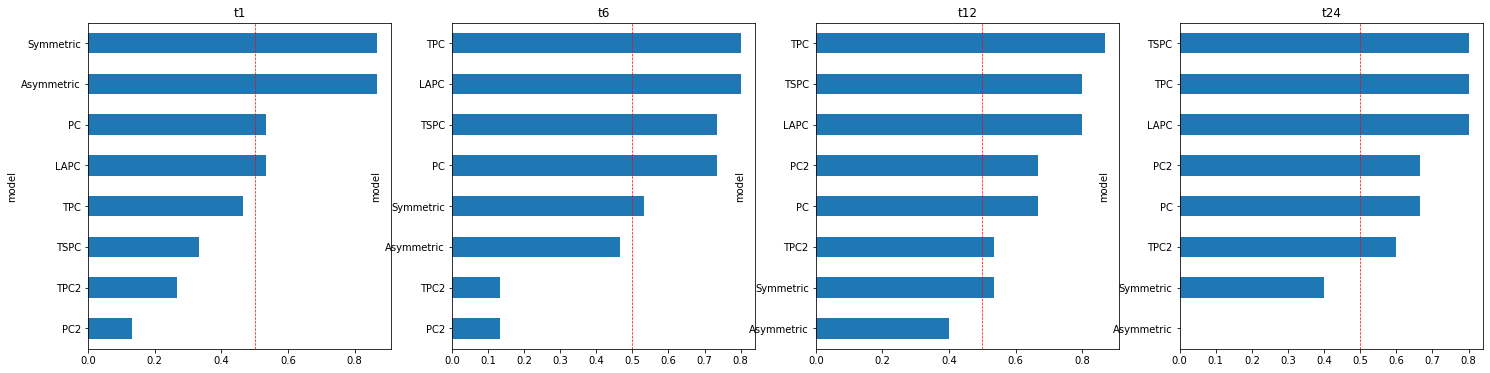

In [72]:
pd.set_option('display.max_rows', 150)
rmsfe_var_sel = rmsfe_ratio_per_models_step.loc[important_var]

fig, ax = plt.subplots(1,4, figsize=(25,6))
ii = 0
for i in ['t1', 't6', 't12', 't24']:#rmsfe_ratio_per_models_step.columns.unique("step-ahead"):
    rmsfe_i = rmsfe_var_sel.xs(i, axis=1, level=1)
    ((rmsfe_i <= 1).sum()/len(rmsfe_i)).sort_index().sort_values().plot(title = i, kind="barh", ax=ax[ii])
    ax[ii].axvline(0.5, linestyle="--", color='red', linewidth=0.7)
    ii+=1
plt.show()

## Var Selected

In [73]:
rmsfe_mdl_min = rmsfe_var_sel.stack("step-ahead")
best_mdl_per_var = []
for i in rmsfe_mdl_min.index:
    min_i = rmsfe_mdl_min.xs(i).min()
    if min_i <=1:
        best_mdl_per_var.append(list(i) + [rmsfe_mdl_min.xs(i)[rmsfe_mdl_min.xs(i) == min_i].index[0]])
    else:
        best_mdl_per_var.append(list(i) + ["AR(1)"])
best_mdl_per_var = pd.DataFrame(best_mdl_per_var, columns=["variable", "step-ahead", "model"])

In [74]:
best_mdl_per_var.set_index(["variable", "step-ahead"]).unstack("step-ahead")

model                                 
step-ahead               t1        t12        t24         t6
variable                                                    
CES2000000008           TPC        TPC        TPC       LAPC
CES3000000008          TSPC       LAPC       LAPC       LAPC
CLAIMSx               AR(1)       TSPC        TPC       TSPC
CPIAUCSL          Symmetric  Symmetric  Symmetric  Symmetric
CPIULFSL          Symmetric  Symmetric  Symmetric      AR(1)
CUMFNS           Asymmetric       LAPC       LAPC       TSPC
CUSR0000SAC       Symmetric        TPC  Symmetric  Symmetric
DPCERA3M086SBEA  Asymmetric       LAPC       LAPC       LAPC
INDPRO           Asymmetric       LAPC       TSPC       LAPC
IPMANSICS              TPC2        TPC       TSPC       LAPC
MANEMP                  TPC       LAPC       TSPC         PC
PAYEMS            Symmetric       TSPC       TSPC       TSPC
RPI               Symmetric        TPC       LAPC       LAPC
UMCSENTx              AR(1)       LAPC        TPC       LAPC
UNRATE           Asymmetric        TPC       LAPC       TSPC

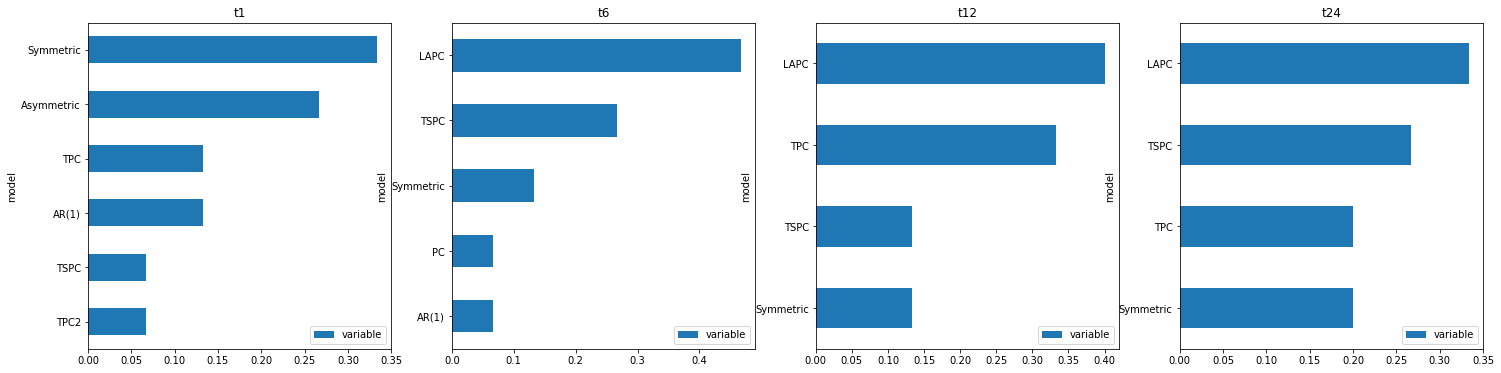

In [75]:
ratio_best_mdl = best_mdl_per_var.groupby(["model", "step-ahead"]).count()/len(best_mdl_per_var["variable"].unique())
fig, ax = plt.subplots(1,4,figsize=(25,6))
ii = 0
for step in ['t1', 't6', 't12', 't24']:
    ratio_best_mdl.xs(step, level="step-ahead").sort_values(by="variable").plot(title=step, kind="barh", ax=ax[ii])
    ii+=1
plt.show()

## Improvement

In [408]:
rmsfe_var_sel.filter(like="t1")

model                LAPC                  PC                 PC2            \
step-ahead             t1       t12        t1       t12        t1       t12   
variable                                                                      
RPI              1.063934  0.810795  1.034600  0.912607  1.265471  1.120370   
INDPRO           1.081700  1.161127  1.071650  1.283541  1.165596  2.221635   
IPMANSICS        1.185035  1.157849  1.324660  1.272236  2.179181  2.695943   
CUMFNS           1.159744  1.156609  1.245373  1.265328  2.335564  2.282762   
PAYEMS           0.917149  1.073213  0.896874  1.078019  0.882610  1.430012   
MANEMP           0.865223  1.097497  0.872555  1.221382  1.157632  1.483329   
CLAIMSx          1.073432  1.035405  1.077381  1.045077  1.119800  1.252491   
UNRATE           1.071455  1.107892  1.011947  1.231154  1.026657  1.466587   
CES2000000008    0.929189  0.987483  1.346186  1.142032  2.488414  1.928153   
CES3000000008    0.898264  0.956119  1.221443  1.209042  1.843923  2.938561   
DPCERA3M086SBEA  1.259358  1.202034  1.291967  1.473513  1.688546  2.564051   
UMCSENTx         1.056378  1.211031  1.070479  1.238683  3.459055  3.480340   
CPIAUCSL         1.308403  0.796212  1.359938  0.823161  1.994032  1.666885   
CPIULFSL         1.218542  0.804774  1.479201  0.847925  2.302727  2.026823   
CUSR0000SAC      1.101068  0.910012  1.120146  0.938295  2.442810  1.762536   

model                 TPC                TPC2                TSPC            \
step-ahead             t1       t12        t1       t12        t1       t12   
variable                                                                      
RPI              1.011375  0.882328  1.241222  1.053737  1.095847  0.913104   
INDPRO           1.083167  1.182247  1.116882  1.518973  1.310506  1.411607   
IPMANSICS        1.297659  1.176007  1.259575  1.539592  1.326205  1.147682   
CUMFNS           1.167371  1.139749  1.299499  1.660740  1.210809  1.292481   
PAYEMS           0.903064  1.095010  0.923029  1.439121  0.901117  1.099736   
MANEMP           0.897751  1.139328  1.011671  1.731102  0.908622  1.099528   
CLAIMSx          1.079894  1.101582  1.127186  1.217957  1.086702  1.079366   
UNRATE           1.044713  1.008175  1.102498  1.028894  0.966418  1.115219   
CES2000000008    1.031889  1.047081  1.877977  1.198195  1.612993  1.268601   
CES3000000008    1.076572  1.098364  2.435739  9.498482  0.967049  1.373701   
DPCERA3M086SBEA  1.241279  1.216882  1.205182  1.249220  1.314027  1.517724   
UMCSENTx         1.168656  1.625909  1.383393  1.910505  1.239966  2.852762   
CPIAUCSL         1.354387  0.892881  1.416452  1.229779  1.369594  0.826517   
CPIULFSL         1.161200  0.888187  1.162057  1.137451  1.461747  0.841578   
CUSR0000SAC      1.090607  0.943545  1.266140  1.052979  1.650099  0.905241   

model           Symmetric           Asymmetric            
step-ahead             t1       t12         t1       t12  
variable                                                  
RPI              0.965369  0.926445   1.020724  0.936467  
INDPRO           1.005367  1.036247   0.993820  1.082824  
IPMANSICS        0.996879  1.044554   0.989231  1.087440  
CUMFNS           0.991138  1.060480   0.986413  1.125160  
PAYEMS           0.777526  0.972117   0.776694  0.999526  
MANEMP           0.778904  1.024073   0.796930  1.068491  
CLAIMSx          1.045600  0.999140   1.061245  1.000262  
UNRATE           1.007910  1.004801   1.017239  1.035624  
CES2000000008    0.860684  0.887665   0.855196  0.920214  
CES3000000008    0.800431  0.833355   0.781356  0.822032  
DPCERA3M086SBEA  1.084242  0.957492   1.095973  0.974940  
UMCSENTx         0.991315  0.982661   1.001777  1.050799  
CPIAUCSL         1.034131  0.831780   1.090689  0.881427  
CPIULFSL         1.040652  0.846932   1.097569  0.899888  
CUSR0000SAC      1.061575  0.957056   1.097180  1.031545

In [391]:
aa = rmsfe_var_sel # rmsfe_ratio_per_models_step, rmsfe_var_sel
improv_perc = []
for i in aa.columns.unique("model"):
    # print(i, aa[i][aa[i] < 1].mean())
    improv_perc.append((aa[i].mean() -1).values)
    

In [392]:
pd.DataFrame(improv_perc, index=aa.columns.unique("model"), columns=["t1", "t6", "t12", "t24"])

,t1,t6,t12,t24
model,,,,
LAPC,0.077700,0.039860,0.047983,0.017973
PC,0.164590,0.145978,0.220602,0.114983
PC2,0.779229,1.039853,0.997419,1.268338
TPC,0.108498,0.106695,0.150273,0.116845
TPC2,0.325883,0.958125,2.645892,9.687867
TSPC,0.197971,0.274257,0.181426,0.234997
Symmetric,-0.044275,-0.042304,0.000395,-0.051333
Asymmetric,-0.031082,-0.008208,0.061677,-0.042007


In [ ]:
aa[i][aa[i] < 1].mean()

## All Variables

In [ ]:
rmsfe_mdl_min = rmsfe_ratio_per_models_step.stack("step-ahead")
best_mdl_per_var = []
for i in rmsfe_mdl_min.index:
    min_i = rmsfe_mdl_min.xs(i).min()
    if min_i <=1:
        best_mdl_per_var.append(list(i) + [rmsfe_mdl_min.xs(i)[rmsfe_mdl_min.xs(i) == min_i].index[0]])
    else:
        best_mdl_per_var.append(list(i) + ["AR(1)"])
best_mdl_per_var = pd.DataFrame(best_mdl_per_var, columns=["variable", "step-ahead", "model"])

In [ ]:
ratio_best_mdl = best_mdl_per_var.groupby(["model", "step-ahead"]).count()/len(best_mdl_per_var["variable"].unique())
fig, ax = plt.subplots(1,4,figsize=(25,6))
ii = 0
for step in ['t1', 't6', 't12', 't24']:
    ratio_best_mdl.xs(step, level="step-ahead").sort_values(by="variable").plot(title=step, kind="barh", ax=ax[ii])
    ii+=1
plt.show()

In [ ]:
rmsfe_ratio_min = rmsfe_ratio.groupby(level=[0,1]).idxmin()["RMSFE"].values.tolist()
rmsfe_ratio_min = pd.DataFrame(rmsfe_ratio_min, columns =['variable', 'step-ahead', 'model'])

In [ ]:
rmsfe_ratio_min.groupby(["model"]).count()["variable"].sort_values().plot(kind='bar', figsize=(10,4))

In [31]:
# Load results
# rmsfe_ar = pd.read_csv(f"{parentdir}/examples/empirical/results/rmsfe_ar1_all.csv", index_col=[0,1,2])
# rmsfe_ar.index.names=["variable", "step-ahead", "model"]
# rmsfe_ar.columns =["RMSFE"]
# rmsfe_ar = rmsfe_ar.droplevel("model")
mdls_pred = pd.read_csv(f"{parentdir}/examples/empirical/results/bai_ng_results_final_publ_lag0_final.csv", index_col=[0,1,2])
mdls_pred

PC        TPC       TSPC       TPC2  \
        step-ahead timestamp                                                
RPI     t1         2004-11-30  -0.002904   0.005359   0.000213   0.003939   
                   2004-12-31  -0.004579   0.007680   0.000851   0.011349   
                   2005-01-31  -0.009208  -0.001935  -0.006861   0.000449   
                   2005-02-28   0.005163   0.007428   0.009919   0.004789   
                   2005-03-31  -0.003148   0.007688  -0.002834   0.011959   
...                                  ...        ...        ...        ...   
VIXCLSx t24        2023-06-30  17.556449  17.956626  16.849999  17.358541   
                   2023-07-31  14.341232  14.835850  14.286987  14.890655   
                   2023-08-31  11.092378  14.863361  13.839141  15.301544   
                   2023-09-30  12.010013  16.798132  15.490032  17.193392   
                   2023-10-31  13.351130  14.825566  13.313864  14.686367   

                                     PC2       LAPC        AR1  
        step-ahead timestamp                                    
RPI     t1         2004-11-30   0.000435  -0.000192  -0.000023  
                   2004-12-31  -0.000672   0.001390   0.000116  
                   2005-01-31  -0.013505  -0.002883  -0.001458  
                   2005-02-28   0.006934   0.005975   0.001214  
                   2005-03-31   0.005168  -0.000659  -0.000031  
...                                  ...        ...        ...  
VIXCLSx t24        2023-06-30  17.128270  18.396186  14.724482  
                   2023-07-31  15.059770  13.772860  15.291584  
                   2023-08-31   9.392017  16.189571  14.844723  
                   2023-09-30  13.564324  15.281286  17.210232  
                   2023-10-31  11.691816  15.119220  15.472904  

[115828 rows x 7 columns]

<Axes: xlabel='timestamp'>

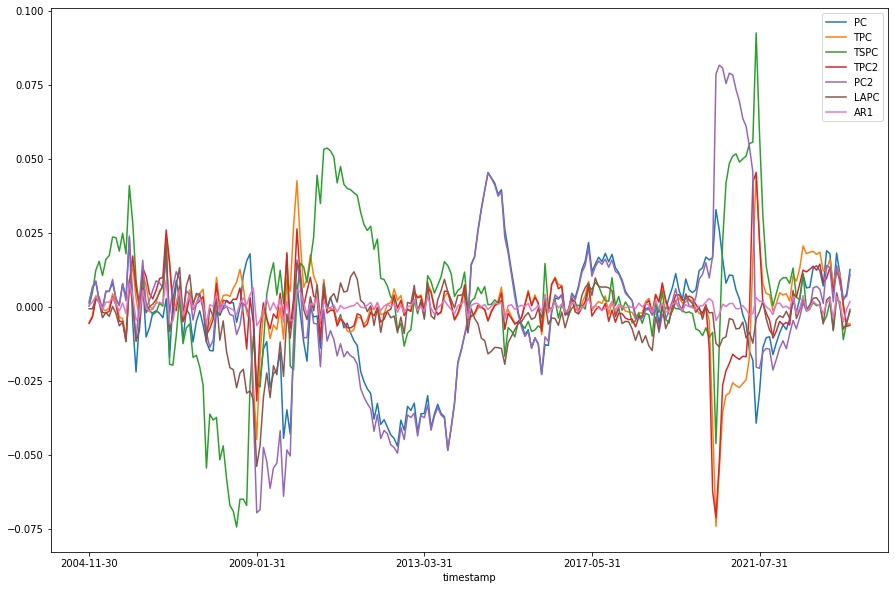

In [39]:
mdls_pred.xs("CPIAUCSL").xs("t1").rolling(12, min_periods=1).sum().plot(figsize=(15,10))